In [1]:
import pandas as pd

data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10],
    'Age': [19,21,20,23,31,22,35,40,50,55],
    'Annual_Income_k$': [15,15,16,17,18,35,40,60,70,90],
    'Spending_Score': [39,81,6,77,40,76,6,40,80,20]
}

df = pd.DataFrame(data)
print(df.head())


   CustomerID  Age  Annual_Income_k$  Spending_Score
0           1   19                15              39
1           2   21                15              81
2           3   20                16               6
3           4   23                17              77
4           5   31                18              40


In [2]:
X = df[['Annual_Income_k$', 'Spending_Score']]


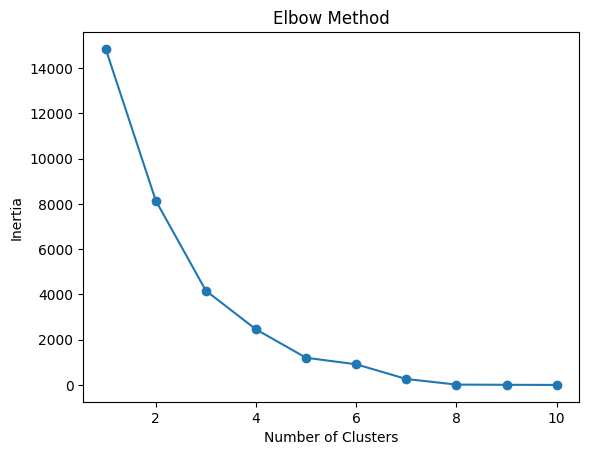

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [4]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


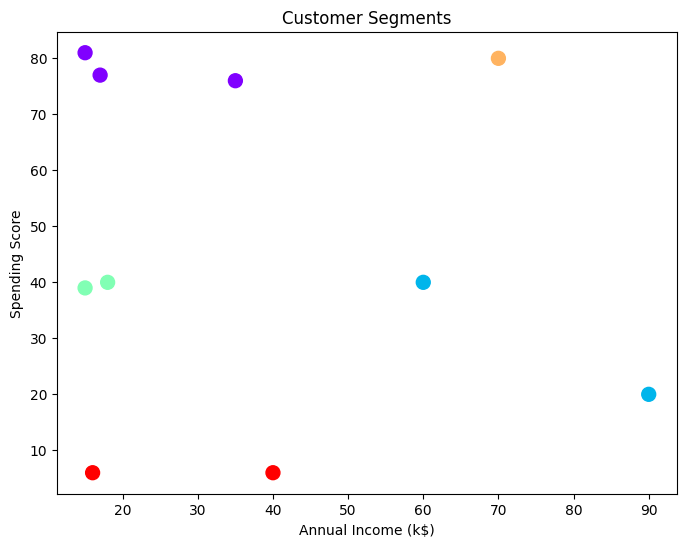

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(df['Annual_Income_k$'], df['Spending_Score'],
            c=df['Cluster'], cmap='rainbow', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()


In [6]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         CustomerID   Age  Annual_Income_k$  Spending_Score
Cluster                                                    
0               4.0  22.0         22.333333            78.0
1               9.0  47.5         75.000000            30.0
2               3.0  25.0         16.500000            39.5
3               9.0  50.0         70.000000            80.0
4               5.0  27.5         28.000000             6.0


In [7]:
new_customer = [[50, 60]]  # income=50k, score=60
cluster = kmeans.predict(new_customer)
print("New customer belongs to cluster:", cluster[0])


New customer belongs to cluster: 3


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
